# LinkedIn Tool Extractor

In [1]:
import sys
sys.path.append("..")

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from modeling.database import MongoDB

## Let's firstly load our database

In [3]:
db = MongoDB()

## Then let's retrieve all documents and keep only the columns that we need

In [4]:
documents = db.get_all_documents()
docs = pd.DataFrame(list(documents))

docs = docs[['roles', 'description']]
docs['roles'] = docs['roles'].apply(lambda x: x[0] if isinstance(x, list) else x)

docs.head()

,roles,description
0,Data Scientist,We are looking for a bright Machine Learning E...
1,ML Engineer,We are looking for a Machine Learning (ML) Eng...
2,Data Scientist,INTRACOM TELECOM is a global telecommunication...
3,Data Scientist,We are in the unique position to experience ne...
4,Data Scientist,We are a growing group of 190+ talented people...


## Data manipulation

1. We make everything lower case
2. We remove special characters
3. Remove digits
4. Remove stop words
5. Lemmatize the description words

In [5]:
## Lower case
docs['description'] = docs['description'].apply(lambda x: " ".join(x.lower()for x in x.split()))
## remove tabulation and punctuation
docs['description'] = docs['description'].str.replace(r'[^\w\s]', ' ', regex=True)
## digits
docs['description'] = docs['description'].str.replace(r'\d+', '', regex=True)
#remove stop words
stop = stopwords.words('english')
docs['description'] = docs['description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

## lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
docs['description'] = docs['description'].apply(lambda x: " ".join([wordnet_lemmatizer.lemmatize(word) for word in x.split()]))

docs.head()

,roles,description
0,Data Scientist,looking bright machine learning engineer join ...
1,ML Engineer,looking machine learning ml engineer help u im...
2,Data Scientist,intracom telecom global telecommunication syst...
3,Data Scientist,unique position experience new interesting sit...
4,Data Scientist,growing group talented people spread three con...


## Let's use wordcloud to see the most common words for each role in the group.

['AI Engineer', 'Data Scientist', 'ML Engineer', 'MLOps']
----- AI Engineer -----


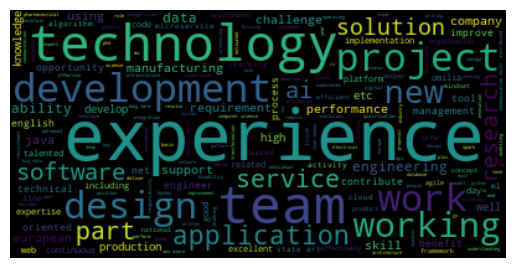

----- Data Scientist -----


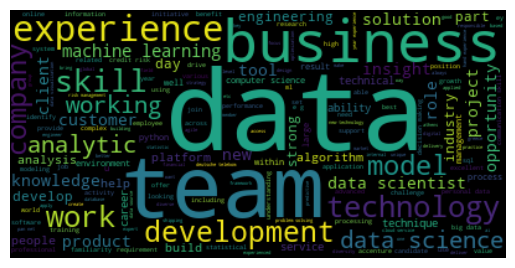

----- ML Engineer -----


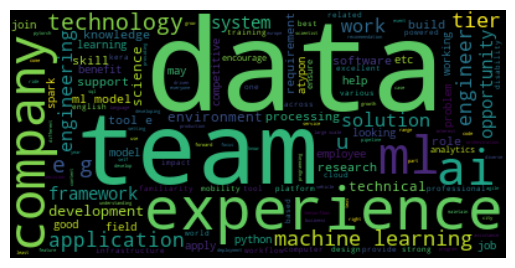

----- MLOps -----


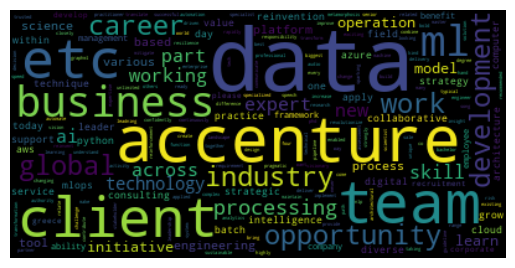

In [6]:
jda = docs.groupby(["roles"]).sum().reset_index()
jobs_list = jda['roles'].unique().tolist()
print(jobs_list)

for role in jobs_list:
    # Start with one review:
    text = jda[jda['roles'] == role].iloc[0].description

    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(text)

    # Display the generated image:
    print(f'----- {role} -----')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()